# Домашнее Задание 2 (20 баллов)
В этом задании Вам предстоит обучить свёрточную нейросеть для решения задачи мультиклассовой классификации на датасете [Tiny ImageNet](https://www.kaggle.com/c/tiny-imagenet) (200 классов, по 500 изображений на класс в трейне и по 50 в валидации и тесте).

## Критерии оценки

* 3 балла за отчет. Без отчёта с графиками лосса и метрики (``accuracy@1``) на обучении работа **не принимается!**
* 3 балла за использование **интерактивного** (не изобретайте велосипед с помощью `plt.plot`) инструмента для просмотра прогресса, например, TensorBoard или Wandb.    
    *В Wandb также можно писать отчёты по вашим данным, попробуйте, это очень экономит время.*
* 7+7 баллов за точность на **тестовом** наборе: 7 за достижение порога в 25%, далее линейно до 50%.
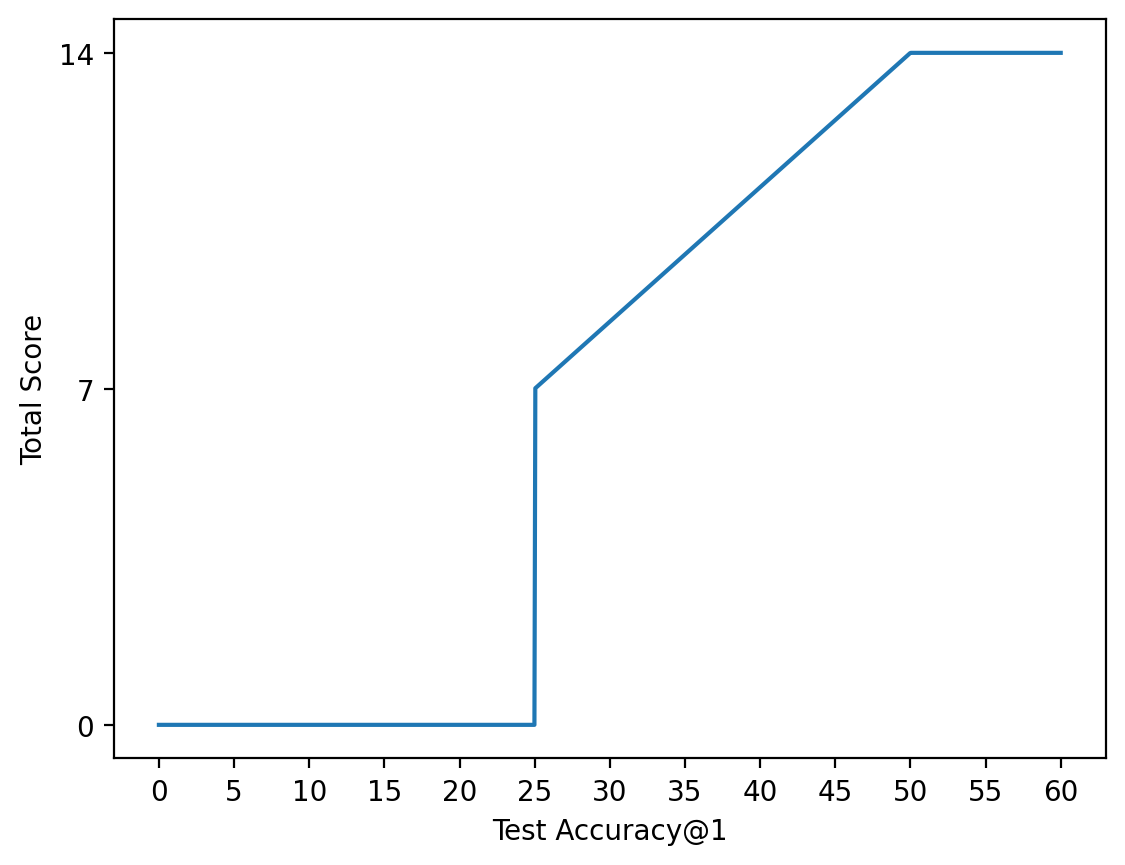
## Объяснение оценок

* *Тест*: это часть набора данных, идентичная валидации, но лейблы известны только нам (не пытайтесь копаться в ImageNet-1K, мы узнаем и поставим 0 баллов). При оценивании мы будем вычислять точность на тесте, запуская ваш код, вычисляющий точность на валидации, но заменяя изображения в `'val/'` тестовым набором.
* *Как отправить*:
   * **<font color="red">Прочитайте это заранее, не откладывайте на последнюю минуту.</font> Неправильно и невовремя поданный на проверку чекпоинт = <font color="red">0 баллов за точность</font>. Будьте внимательны!**
   * После того, как вы обучили свою сеть, [сохраните веса](https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html) в «*checkpoint.pth*» с помощью `model.state_dict()` и ` torch.save()`.
   * Установите `DO_TRAIN = False`, нажмите «Перезапустить и запустить все» и убедитесь, что точность проверки на валидации рассчитана правильно.
   * Вычислите контрольную сумму MD5 для «*checkpoint.pth*» (например, запустите `!md5sum checkpoint.pth`) и вставьте ее в «*solution.py*» (`get_checkpoint_metadata()`). Вы будете оштрафованы, если эта контрольная сумма не будет соответствовать отправленному вами файлу.
   * Загрузите «*checkpoint.pth*» на Google Диск, скопируйте на него ссылку, доступную только для просмотра, и вставьте ее также в «*solution.py*».
   * Убедитесь, что «Перезапустить и запустить все» также работает с `DO_TRAIN = True`: тренирует вашу модель и вычисляет точность проверки **(отработать должно до ячейки `# Print validation accuracy` включительно)**.

* *Отчет*: PDF, свободная форма (можно написать в Markdown или .ipynb, главное сконвертировать в PDF в конце; отчёт в Wandb просто присылайте ссылкой), следует упомянуть:
   * Ваша история настроек и улучшений. Как вы начинали, что искали. (*Я проанализировал те и эти документы/источники/репорты/статьи. Я попробовал то и это, чтобы адаптировать их к моей задаче. ...*)
   * Какие архитектуры вы пробовали? Какие из них не сработали и почему, по Вашему мнению? Какую выбрали на финальный сабмит и почему?
   * То же самое касается метода обучения (batch size, алгоритм оптимизации, количество итераций...): что и почему?
   * То же самое касается методов предотвращения переобучения (регуляризации). Какие из них вы пробовали? Каковы были их последствия и можете ли вы догадаться, почему?
   * **Самое главное**: вы получили глубокие знания. Можете ли вы отрефлексировать и привести несколько примеров того, как опыт этого упражнения повлияет на ваше обучение будущих нейронных сетей? (хитрости, эвристики, выводы, наблюдения)
   * **Перечислите и сошлитесь на все внешние источники кода, если вы их использовали**.
* *Инструмент логгирования*: дополните отчет скриншотами графиков точности и лосса (на трейне и на валидации) с течением времени.

## Ограничения

* Никаких претрейнов.
* Не увеличивайте изображения (например, не изменяйте их размер до $224 \times 224$ или $256 \times 256$).

## Советы

* **Одно изменение за раз**: не тестируйте несколько новых вещей одновременно (если вы не очень уверены, что они будут работать). Обучите модель, внесите одно изменение, обучите снова.
* Много гуглите: постарайтесь изобрести как можно меньше велосипедов. Черпайте вдохновение из туториалов PyTorch, GitHub, блогов...
* Используйте графический процессор.
* Регуляризация очень важна: L2, batch norm, early stopping, аугментации, семплирование...
* Уделяйте большое внимание графикам точности и потерь (например, в TensorBoard). Отслеживайте неудачи как можно раньше, прекращайте неудачные эксперименты как можно раньше.
* 2-3 часов обучения (в Colab) должно быть достаточно для большинства моделей, возможно, 4-6 часов, если вы экспериментируете.
* Время от времени сохраняйте чекпоинты вместе со стейтом оптимизатора на случай, если что-то пойдет не так (оптимизация расходится, Colab отключается...).
* Не используйте слишком большие батчи, они могут работать медленно и требовать много памяти. Это справедливо и для инференса.
* Также не забудьте использовать torch.no_grad() и .eval() во время инференса.

In [ ]:
! git clone https://github.com/voorhs/tiny-imagenet-clf

In [1]:
# Determine the locations of auxiliary libraries and datasets.
# `AUX_DATA_ROOT` is where 'tiny-imagenet.zip' is.

# Detect if we are in Google Colaboratory
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
if IN_COLAB:
    google.colab.drive.mount("/content/drive")

    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/My Drive/ML3_2023/HW2")

    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"

    import sys
    sys.path.append(str(AUX_DATA_ROOT))
else:
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("./dataset")

In [2]:
import os
from urllib.request import urlretrieve

def download_dataset(path, url='http://cs231n.stanford.edu/tiny-imagenet-200.zip'):
    dataset_name = 'tiny-imagenet-200'

    if os.path.exists(os.path.join(path, dataset_name, "val", "n01443537")):
        print("%s already exists, skipping download" % os.path.join(path, dataset_name))
        return
    elif not os.path.exists(os.path.join(path, 'tiny-imagenet-200' + ".zip")):
        print("Dataset doesn't exist or is broken, downloading it")
        urlretrieve(url, os.path.join(path, dataset_name + ".zip"))

    import zipfile
    with zipfile.ZipFile(os.path.join(path, 'tiny-imagenet-200' + ".zip"), 'r') as archive:
        archive.extractall()

    # move validation images to subfolders by class
    val_root = os.path.join(".", dataset_name, "val")
    with open(os.path.join(val_root, "val_annotations.txt"), 'r') as f:
        for image_filename, class_name, _, _, _, _ in map(str.split, f):
            class_path = os.path.join(val_root, class_name)
            os.makedirs(class_path, exist_ok=True)
            os.rename(
                os.path.join(val_root, "images", image_filename),
                os.path.join(class_path, image_filename))

    os.rmdir(os.path.join(val_root, "images"))
    os.remove(os.path.join(val_root, "val_annotations.txt"))


In [3]:
# Your solution should be in the same directory and named solution.py
%load_ext autoreload
%autoreload 1

%aimport solution

  Using cached gdown-4.4.0-py3-none-any.whl
  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.1
    Uninstalling gdown-4.7.1:
      Successfully uninstalled gdown-4.7.1



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# If `True`, will train the model from scratch and validate it.
# If `False`, instead of training will load weights from './checkpoint.pth'.
# When grading, we will test both cases.
DO_TRAIN = True

In [5]:
# Put training and validation images in `./tiny-imagenet-200/train` and `./tiny-imagenet-200/val`:
download_dataset(AUX_DATA_ROOT)

dataset/tiny-imagenet-200 already exists, skipping download


In [6]:
root_datasets = "./dataset"

In [7]:
import solution


# Initialize dataloaders
train_dataloader = solution.get_dataloader(f"{root_datasets}/tiny-imagenet-200/", 'train')
val_dataloader   = solution.get_dataloader(f"{root_datasets}/tiny-imagenet-200/", 'val')
test_dataloader  = solution.get_dataloader(f"{root_datasets}/tiny-imagenet-200/", 'test')
# Initialize the raw model
model = solution.get_model()

/home/ilya/repos/tiny-imagenet-clf/.venv/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [8]:
if DO_TRAIN:
    # Train from scratch
    optimizer = solution.get_optimizer(model)
    solution.train_on_tinyimagenet(train_dataloader, val_dataloader, model, optimizer)
else:
    # Download the checkpoint and initialize model weights from it
    import urllib
    import subprocess

    penalize = False

    # Get your link and checksum
    claimed_md5_checksum, google_drive_link = solution.get_checkpoint_metadata()

    # Use your link to download "checkpoint.pth"
    ! pip install -U gdown
    ! gdown --id {urllib.parse.urlparse(google_drive_link).path.split('/')[-2]} -O weights.ckpt

    try:
        # Compute the actual checksum
        real_md5_checksum = subprocess.check_output(
            ["md5sum", "weights.ckpt"]).decode().split()[0]
    except subprocess.CalledProcessError as err:
        # Couldn't download or the filename isn't "checkpoint.pth"
        print(f"Wrong link or filename: {err}")
        penalize = True
    else:
        # The trained checkpoint is different from the one submitted
        if real_md5_checksum != claimed_md5_checksum:
            print("Checksums differ! Late submission?")
            penalize = True

    if penalize:
        print("🔫 Prepare the penalizer! 🔫")

    # Finally load weights
    solution.load_weights(model, "./weights.ckpt")

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ilya_alekseev_2016. Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type     | Params
-----------------------------------
0 | model | Ensemble | 98.8 M
-----------------------------------
240 K     Trainable params
98.6 M    Non-trainable params
98.8 M    Total params
395.214   Total estimated model params size (MB)
/home/ilya/repos/tiny-imagenet-clf/.venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
Time limit reached. Elapsed time is 0:03:00. Signaling Trainer to stop.


In [11]:
model = model.cuda().eval()

In [12]:
example_batch, example_batch_labels = next(iter(val_dataloader))

In [13]:
# Classify some validation samples
import torch

example_batch, example_batch_labels = next(iter(val_dataloader))
model.eval()
with torch.no_grad():
    _, example_predicted_labels = solution.predict(model, example_batch).max(1)

print("Predicted class / Ground truth class")
for predicted, gt in list(zip(example_predicted_labels, example_batch_labels))[:15]:
    print("{:03d} / {:03d}".format(predicted, gt))

Predicted class / Ground truth class
174 / 000
159 / 000
047 / 000
000 / 000
066 / 000
000 / 000
148 / 000
159 / 000
038 / 000
000 / 000
000 / 000
000 / 000
023 / 000
026 / 000
007 / 000


In [14]:
# Print validation accuracy
val_accuracy, _ = solution.validate(val_dataloader, model)
val_accuracy *= 100
assert 1.5 <= val_accuracy <= 100.0
print("Validation accuracy: %.2f%%" % val_accuracy)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/ilya/repos/tiny-imagenet-clf/.venv/lib/python3.10/site-packages/lightning/pytorch/core/module.py:491: You called `self.log('val_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
/home/ilya/repos/tiny-imagenet-clf/.venv/lib/python3.10/site-packages/lightning/pytorch/core/module.py:491: You called `self.log('val_metric', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss             4.802745342254639
       val_metric           0.11699999868869781
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Validation accuracy: 11.70%


In [15]:
import torch
torch.enable_grad(False)

model = model.cuda()
model.eval()

# predict on val
import pandas as pd
all_preds = []
true = 0
for batch in val_dataloader:
    images = batch[0].cuda()
    targets = batch[1]
    pred_labels = model(images).argmax(1).cpu()
    all_preds.append(pred_labels)
    true += torch.count_nonzero(targets == pred_labels).item()
all_preds = torch.concat(all_preds)
print('val accuracy:', true / len(all_preds))

all_names = val_dataloader.dataset.class_directories
image_file_names = val_dataloader.dataset.image_names
val_df = pd.DataFrame({
    'id': [image_file_names[i//50][i%50] for i, i_class in enumerate(all_preds)],
    'pred': [all_names[i_class] for i_class in all_preds]
}).set_index('id')

# predict on test
all_preds = []
for batch in test_dataloader:
    images = batch.cuda()
    pred_labels = model(images).argmax(1).cpu()
    all_preds.append(pred_labels)
all_preds = torch.concat(all_preds)

image_file_names = test_dataloader.dataset.image_names
test_df = pd.DataFrame({
    'id': [image_file_names[i] for i, i_class in enumerate(all_preds)],
    'pred': [all_names[i_class] for i_class in all_preds]
}).set_index('id')

# merge test and val (make submission)
subm = pd.concat([val_df, test_df], axis=0)

val accuracy: 0.117
